<a href="https://colab.research.google.com/github/mdparvex/DeepFake/blob/main/XceptionModelDataset140k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
!unrar x "/content/drive/MyDrive/real-vs-fake.rar"

Streaming output truncated to the last 5000 lines.
Extracting  real-vs-fake/valid/real/34827.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34828.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34832.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34836.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34839.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34847.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34848.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34852.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34861.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34864.jpg                             96%  OK 
Extracting  real-vs-fake/vali

In [ ]:
train= '/content/real-vs-fake/train'
val= '/content/real-vs-fake/valid'

In [ ]:

image_gen = ImageDataGenerator(rescale=1./255.
                               )
batch_size = 64
train_flow= image_gen.flow_from_directory(
    train,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode ='binary'
)


image_gen1 = ImageDataGenerator(rescale=1./255.)
valid_flow = image_gen1.flow_from_directory(
    val,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
'''from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.1))
          
model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))'''

In [ ]:
from tensorflow.keras.applications import Xception
# Create model
model = Sequential()

# Create the base with Xception
conv_base = Xception(weights = 'imagenet', include_top = True, 
                     classifier_activation = 'softmax') 
conv_base.trainable = True
model.add(conv_base)

model.add(Flatten())

# Add Dense Layers
model.add(Dense(256, activation = 'tanh'))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))


91897856/91884032 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 1000)              22910480  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 256)               256256    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                5

In [ ]:
# Parameters Initialization
from tensorflow.keras.optimizers import SGD, Adam

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=Adam(0.001), metrics=['accuracy'])

In [ ]:
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = model.fit(
    train_flow,
    epochs=10,
    steps_per_epoch=train_steps,
    validation_data=valid_flow,
    validation_steps=valid_steps
)

Epoch 1/10
625/625 [==============================] - 801s 1s/step - loss: 0.1405 - accuracy: 0.9441 - val_loss: 0.9497 - val_accuracy: 0.7839
Epoch 2/10
625/625 [==============================] - 801s 1s/step - loss: 0.0409 - accuracy: 0.9855 - val_loss: 0.1432 - val_accuracy: 0.9589
Epoch 3/10
625/625 [==============================] - 801s 1s/step - loss: 0.0260 - accuracy: 0.9908 - val_loss: 0.0747 - val_accuracy: 0.9742
Epoch 4/10
625/625 [==============================] - 802s 1s/step - loss: 0.0223 - accuracy: 0.9919 - val_loss: 0.0383 - val_accuracy: 0.9870
Epoch 5/10
625/625 [==============================] - 809s 1s/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 6/10
625/625 [==============================] - 810s 1s/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0372 - val_accuracy: 0.9872
Epoch 7/10
625/625 [==============================] - 805s 1s/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0289 - val_accuracy: 0.9920

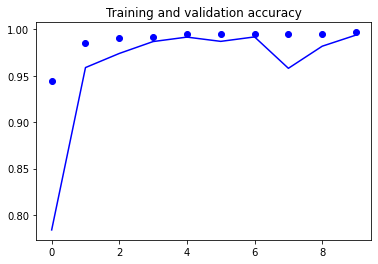

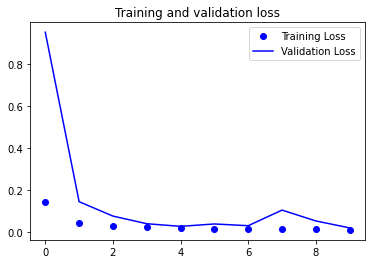

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

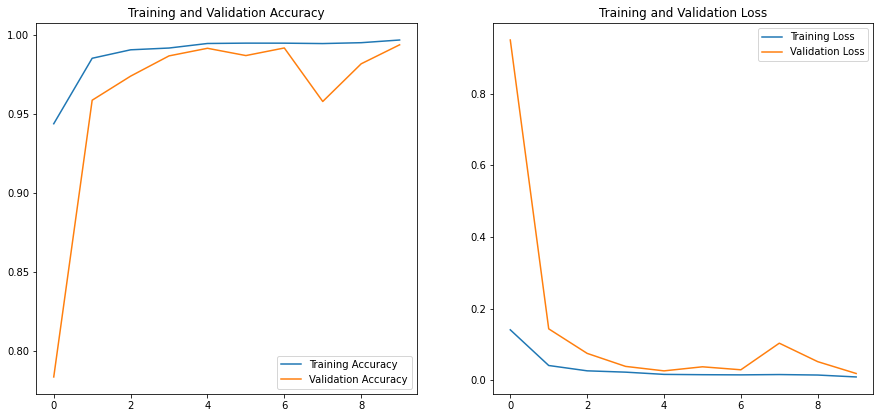

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#scores = model.evaluate(x_test,y_test , verbose=1)

In [ ]:
'''accuracy= scores[1]*100
loss=scores[0]
print('Accuracy: ', accuracy)
print('Loss: ',  loss)

In [ ]:
model.save('Xceptionmodel.h5')

In [ ]:
model=tf.keras.models.load_model('model.h5')

In [ ]:
test='/content/real-vs-fake/test'
image_gen1 = ImageDataGenerator(rescale=1./255.)
test_generator = image_gen1.flow_from_directory(
    test,
    target_size = (224, 224),
    batch_size = 1,
    shuffle = False,
    class_mode ='binary'
)

Found 20000 images belonging to 2 classes.


In [ ]:
#actual = test_generator.classes
#predict = np.argmax(model.predict(test_generator),axis =1)

In [ ]:
predict = model.predict(test_generator)
actual = test_generator.classes


In [ ]:
print(predict)

[[1.1916294e-03]
 [1.3006158e-04]
 [1.2993229e-04]
 ...
 [9.9987864e-01]
 [9.9987864e-01]
 [9.9987864e-01]]


In [ ]:
print(actual)

[0 0 0 ... 1 1 1]


In [ ]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(actual, predict))
print("AP Score:", metrics.average_precision_score(actual, predict))
print()
print(metrics.classification_report(actual, predict > 0.5))

ROC AUC Score: 0.99981641
AP Score: 0.9998149002067998

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.99      0.99      0.99     10000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))